In [1]:
#import libs and tools
import warnings
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sns
from pandas import datetime
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
color = sns.color_palette()
print('Please wait. Importing data...')
df_lfu = pd.read_csv('C:/Users/ThinkPad/Desktop/models/NO2_2020_05.csv',header=0,encoding='utf-8')
df_fzi = pd.read_csv('C:/Users/ThinkPad/Desktop/models/NO2_mean_1h.csv',header=0,encoding='utf-8')
print('import completed.')
df_fzi['timestamp'] = pd.to_datetime(df_fzi['timestamp'])
df_fzi = df_fzi.set_index('timestamp') 

#def date_parser(x):
#    return datetime.strptime(x, "%d.%m.%Y %H:%M")
df_lfu[['date','time']] = df_lfu['Zeitpunkt'].str.split(expand=True)
df_lfu['datetime'] = (pd.to_datetime(df_lfu.pop('date'), format='%d.%m.%Y') + 
                  pd.to_timedelta(df_lfu.pop('time') + ':00'))
df_lfu = df_lfu.set_index('datetime') 
print (df_lfu,df_fzi)





Please wait. Importing data...
import completed.
                            Zeitpunkt  Augsburg/Königsplatz
datetime                                                   
2020-05-01 01:00:00  01.05.2020 01:00                     8
2020-05-01 02:00:00  01.05.2020 02:00                     7
2020-05-01 03:00:00  01.05.2020 03:00                    10
2020-05-01 04:00:00  01.05.2020 04:00                    12
2020-05-01 05:00:00  01.05.2020 05:00                    20
...                               ...                   ...
2020-05-31 20:00:00  31.05.2020 20:00                     9
2020-05-31 21:00:00  31.05.2020 21:00                    10
2020-05-31 22:00:00  31.05.2020 22:00                    11
2020-05-31 23:00:00  31.05.2020 23:00                     9
2020-06-01 00:00:00  31.05.2020 24:00                     9

[744 rows x 2 columns]                         no2
timestamp                  
2020-02-19 00:00:00   9.153
2020-02-19 01:00:00   6.167
2020-02-19 02:00:00  17.308
2020-02

In [3]:
df_fzi=df_fzi['2020-05-18':'2020-05-24']

In [4]:
df=df_fzi
df['lfu']=df_lfu['Augsburg/Königsplatz']
df['fzi']=df_fzi['no2']
print(df)

                        no2  lfu     fzi
timestamp                               
2020-05-18 00:00:00  60.378   37  60.378
2020-05-18 01:00:00  56.504   47  56.504
2020-05-18 02:00:00  64.313   43  64.313
2020-05-18 03:00:00  57.928   51  57.928
2020-05-18 04:00:00  69.019   47  69.019
...                     ...  ...     ...
2020-05-24 19:00:00  16.249    8  16.249
2020-05-24 20:00:00  22.355   11  22.355
2020-05-24 21:00:00  25.155   14  25.155
2020-05-24 22:00:00  24.356   17  24.356
2020-05-24 23:00:00  22.744   13  22.744

[168 rows x 3 columns]


In [8]:
import numpy as np
lfu=df.lfu.values
fzi=df.fzi.values
a=len(fzi)
b=np.ones(a)
c = np.row_stack((fzi,b))
ATA = np.dot(c,c.T) 
ATb = np.dot(c,lfu.T)
res = np.linalg.solve(ATA, ATb)
print(res)

[ 0.51586112 12.85409719]


In [9]:
cali=res[0]*fzi+res[1]
print(cali)

[44.00075967 42.0023137  46.03067316 42.73689993 48.45831557 43.21923008
 44.26642814 30.07405711 16.96086753 12.93250808 14.11331417 15.78109316
 14.05966461 14.64929387 14.56469265 15.72950705 15.74910977 17.99774838
 22.8437477  30.89376042 31.39414571 45.80678943 52.71055875 30.99951195
 28.50377587 28.51460895 40.12819027 36.72866551 42.25250634 45.91924716
 38.6192965  27.98791475 15.93946252 13.51078839 13.81359886 13.73776728
 13.31991977 13.46745605 14.57552573 13.69133978 13.41225891 16.21957511
 18.76122283 27.38951586 24.14784461 27.22495616 28.53937029 29.58502077
 25.70471345 24.14681288 25.10940973 29.11507129 32.84268372 41.02888378
 38.91849595 34.06424284 29.14189607 23.66087171 21.38540833 15.07797446
 13.04599752 13.59229444 13.45920227 13.77542514 16.70964317 20.01424948
 21.6046493  21.04597171 24.10760744 29.88009333 34.24479423 32.34384602
 31.49680207 29.48133269 29.54994222 35.6076993  33.60615817 25.9641916
 21.67841744 17.63716146 13.09294088 12.86080338 12.

In [10]:
from pandas import DataFrame
df["cali"] = DataFrame(cali,index=df.index)

The Mean Squared Error of fzi is 209.73
The Mean Squared Error of calibration is 109.99


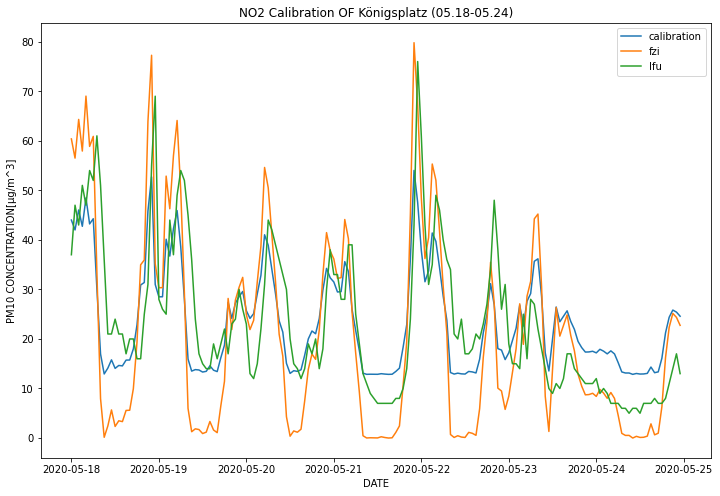

In [12]:
fig = plt.figure(figsize=(12,8))
plt.plot(df["cali"],label="calibration")
plt.plot(df['fzi'],label="fzi")
plt.plot(df['lfu'],label="lfu")
plt.xlabel("DATE")
plt.ylabel("PM10 CONCENTRATION[μg/m^3]")
plt.title("NO2 Calibration OF Königsplatz (05.18-05.24)")
plt.legend()
no2_fzi=df['fzi']
no2_cali=df["cali"]
no2_truth = df['lfu']
rmse_fzi = ((no2_fzi- no2_truth) ** 2).mean()
rmse_cali = ((no2_cali- no2_truth) ** 2).mean()
print('The Mean Squared Error of fzi is {}'.format(round(rmse_fzi, 2)))
print('The Mean Squared Error of calibration is {}'.format(round(rmse_cali, 2)))


